In [1]:
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
X,Y = mnist['data'], mnist['target']
x1 = np.array(X)
y1 = np.array(Y)

In [4]:
maxX1 = x1.max()
minX1 = x1.min()
rangeX = maxX1-minX1
x2 = x1 / rangeX
maxX2 = x2.max()
minX2 = x2.min()

y2 = y1.astype(int)
labels = y2

In [5]:
kclusters = range(2,15)
sse = []
sil_score =[]

In [6]:
for k in kclusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x2)
    sse.append(kmeans.inertia_)

    score = silhouette_score(x2,kmeans.labels_)
    sil_score.append(score)


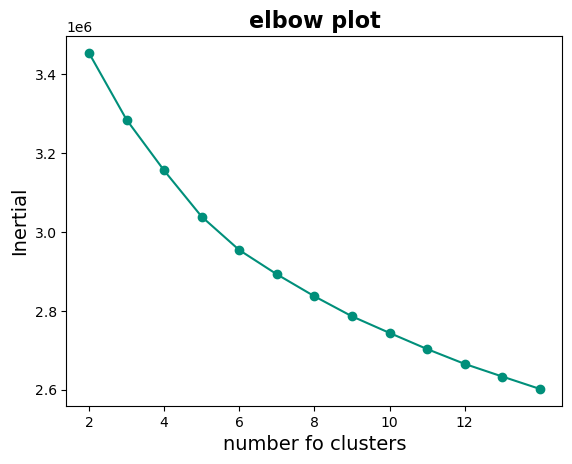

In [49]:
plt.figure(1)
plt.plot(kclusters,sse,marker='o',color='#008F7A')
plt.xticks(ticks=range(2,14,2))
plt.xlabel('number fo clusters',fontsize=14)
plt.ylabel('Inertial',fontsize=14)
plt.title('elbow plot', fontsize=16, fontweight='bold')

plt.show()

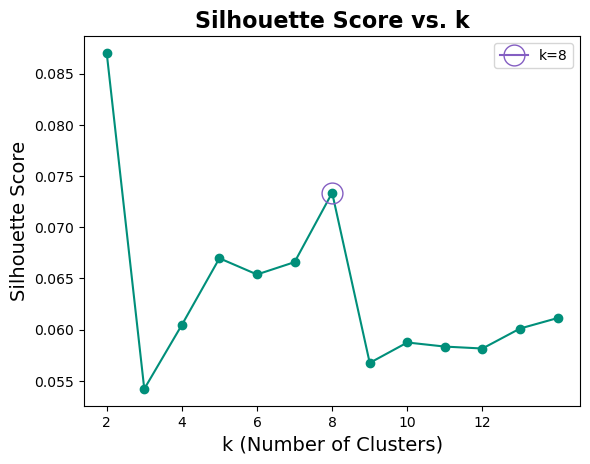

In [50]:
plt.figure(2)
plt.plot(kclusters,sil_score,marker='o',color='#008F7A')
plt.xticks(ticks=range(2,14,2))
plt.yticks()


plt.title("Silhouette Score vs. k", fontsize=16, fontweight='bold')  # Title with larger font
plt.xlabel("k (Number of Clusters)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)


k_target = 8
target_score = sil_score[kclusters.index(k_target)]
plt.plot(k_target, target_score, marker='o', markerfacecolor='none',color='#845EC2', markersize=15, label="k=8")  # Red marker for k=8
plt.legend()
plt.show()

In [9]:
kOptimal = 8

In [10]:
kmeans = KMeans(n_clusters=kOptimal)
kmeans.fit(x2)
cluster_centers = kmeans.cluster_centers_
PredictLabels = kmeans.labels_


In [11]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(x2)

Text(0.5, 1.0, 'Predict Result')

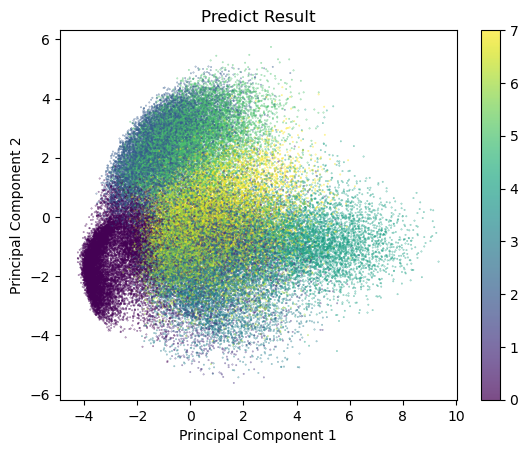

In [51]:
plt.figure(3)
#plt.subplot(1,2,1)
scatter=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=PredictLabels,s=0.1,alpha=0.7,cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Predict Result')

Text(0.5, 1.0, 'Real Result')

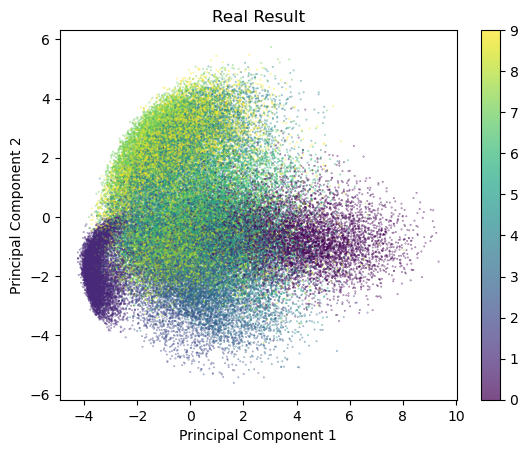

In [46]:
plt.figure(4)
#plt.subplot(1,2,2)
scatter=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=labels,s=0.1,alpha=0.7,cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Real Result')

Text(0, 0.5, 'Principal Component 2')

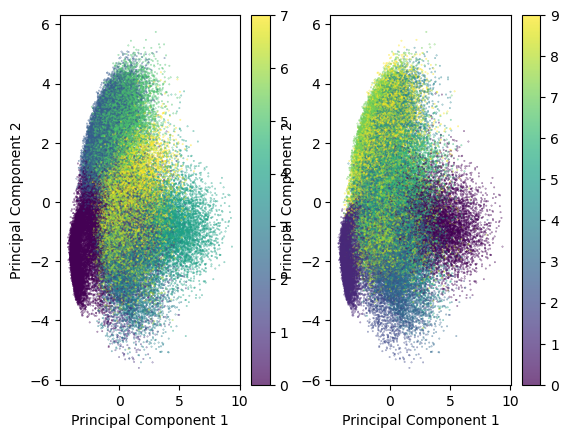

In [14]:
plt.figure(5)
plt.subplot(1,2,1)
scatter1=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=PredictLabels,s=0.1,alpha=0.7,cmap='viridis')
plt.colorbar(scatter1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1,2,2)
scatter2=plt.scatter(X_reduced[:,0],X_reduced[:,1],c=labels,s=0.1,alpha=0.7,cmap='viridis')
plt.colorbar(scatter2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [15]:
true_labels = labels
n_clusters = np.unique(PredictLabels).size
mapped_labels = np.zeros_like(PredictLabels)

for i in range(n_clusters):
    mask = (PredictLabels == i) 
    if np.any(mask):  
        mapped_labels[mask] = mode(true_labels[mask]).mode[0]

accuracy = accuracy_score(true_labels, mapped_labels)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.58


/var/folders/2g/459sbv5n1nqdqmcjkz8x03700000gn/T/ipykernel_45163/1927039589.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mapped_labels[mask] = mode(true_labels[mask]).mode[0]


In [22]:
mnist = fetch_openml('mnist_784', version=1)

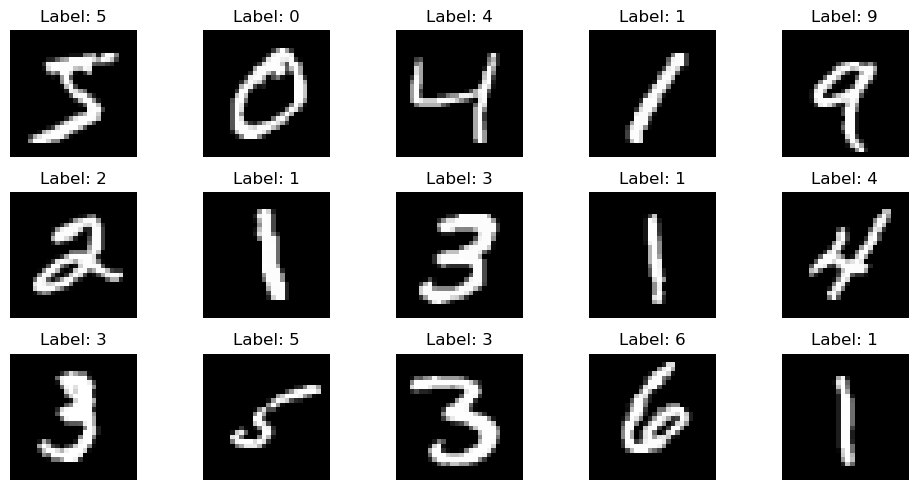

In [21]:
imagesshow = mnist.data.to_numpy().reshape(-1, 28, 28) 
labelsshow = mnist.target


fig, axes = plt.subplots(3, 5, figsize=(10, 5))


for i, ax in enumerate(axes.flat):
    ax.imshow(imagesshow[i], cmap='gray')
    ax.set_title(f"Label: {labelsshow[i]}")
    ax.axis('off')  


plt.tight_layout()
plt.show()